### 신세계 주가 분석

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font='malgun.ttf'
f_name=fm.FontProperties(fname=font).get_name()
mpl.rc('font',family=f_name)

In [2]:
dbname="naverstock.db"
def seldb(scode='004170',frday=0):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        #sqlins="insert into ..."
        sqlsel="select SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL from stockdata where scode='{0}' and sday>{1} order by SDAY asc".format(scode,frday)
        sdata=cur.execute(sqlsel).fetchall()
    return sdata


In [3]:
nstock=seldb('004170',frday=20200101)
len(nstock)

189

### 데이터 프레임화
* 데이터 프레임을 통해 데이터 분석을 용이 하게 함
* 최근 코로나에 의한 변동성 추이를 보기위해 최근 1년간 데이터 확인

In [4]:
col=['SDAY','SOPEN','SHIGH','SLOW','SCLOSE','SVOL']
sf=pd.DataFrame(data=nstock,columns=col)
sf.head()


,SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL
0,20200102,289500,296500,289500,292500,48510
1,20200103,296500,297000,290500,292500,40984
2,20200106,288000,294000,288000,290000,24759
3,20200107,293000,311500,291500,305000,99705
4,20200108,305000,312000,299000,306500,73747


### 기초통계분석
* 기업의 주가 변동 상황의 기초적 통계를 통해 변동성을 추정 
* 중위수가 평균보다 낮은 상황을 볼수 있다.

In [5]:
sf.describe()

,SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL
count,1.890000e+02,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2.020053e+07,239095.238095,243907.407407,234478.835979,238746.031746,98322.079365
std,2.613631e+02,31997.779653,33074.354469,31271.368468,32142.577112,47511.682461
min,2.020010e+07,203000.000000,204000.000000,199000.000000,200500.000000,24759.000000
25%,2.020031e+07,211500.000000,216500.000000,208000.000000,211500.000000,64872.000000
50%,2.020052e+07,232500.000000,238000.000000,225000.000000,231000.000000,90286.000000
75%,2.020073e+07,255500.000000,261500.000000,249500.000000,254500.000000,121881.000000
max,2.020101e+07,328000.000000,333500.000000,319500.000000,324000.000000,310579.000000


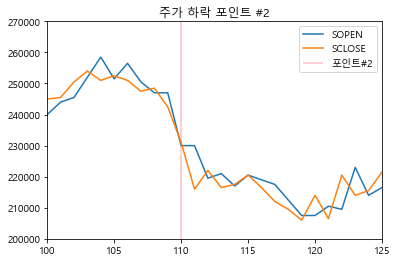

In [6]:
sf[['SOPEN','SCLOSE']].plot()
plt.xlim(100,125)
plt.ylim(200000,270000)
plt.title("주가 하락 포인트 #2")
plt.vlines(110,200000,2700000,color="pink", label="포인트#2")
plt.legend()
plt.show()

In [7]:
days=[str(d)[0:4]+"-"+str(d)[4:6]+"-"+str(d)[6:8] for d in sf['SDAY']]


['2020-01-02',
 '2020-01-03',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-06',
 '2020-04-

In [8]:
col=['SCLOSE']
movdf=sf[col]
movdf.index=days
movdf.head()

,SCLOSE
2020-01-02,292500
2020-01-03,292500
2020-01-06,290000
2020-01-07,305000
2020-01-08,306500


In [9]:
# 이평선 함수
def makeMov(srcList=[],mday=5):
    movline=[0 for i in range(mday-1)]
    rLen=len(srcList)-(mday-1)
    for i in range(rLen):
        m=np.mean(srcList[i:mday+i])
        movline.append(m)
    return movline

In [10]:
# 이동평균 데이터 만들기
movdf['mov5']=makeMov(movdf['SCLOSE'],5)
movdf['mov20']=makeMov(movdf['SCLOSE'],20)
movdf.head(30)

<ipython-input-10-9a3830cc26b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['mov5']=makeMov(movdf['SCLOSE'],5)
<ipython-input-10-9a3830cc26b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['mov20']=makeMov(movdf['SCLOSE'],20)


,SCLOSE,mov5,mov20
2020-01-02,292500,0.0,0.0
2020-01-03,292500,0.0,0.0
2020-01-06,290000,0.0,0.0
2020-01-07,305000,0.0,0.0
2020-01-08,306500,297300.0,0.0
2020-01-09,314500,301700.0,0.0
2020-01-10,312500,305700.0,0.0
2020-01-13,324000,312500.0,0.0
2020-01-14,321500,315800.0,0.0
2020-01-15,323500,319200.0,0.0


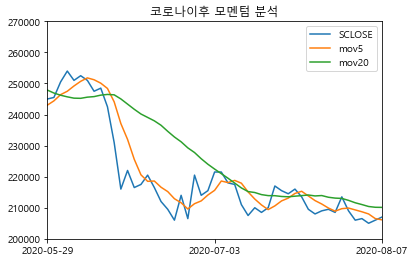

In [11]:
movdf.plot()
plt.title("코로나이후 모멘텀 분석")
plt.xlim(100,150)
plt.ylim(200000,270000)
plt.show()

In [12]:
movdf.tail()

,SCLOSE,mov5,mov20
2020-09-25,204000,206800.0,210375.0
2020-09-28,208500,206200.0,210650.0
2020-09-29,212500,207000.0,211075.0
2020-10-05,213000,208100.0,211050.0
2020-10-06,210000,209600.0,210875.0


In [13]:
movdf['diff']=(movdf['mov5']-movdf['mov20'])/np.abs(movdf['mov5']-movdf['mov20'])
movdf.tail()

<ipython-input-13-32f54fe042fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['diff']=(movdf['mov5']-movdf['mov20'])/np.abs(movdf['mov5']-movdf['mov20'])


,SCLOSE,mov5,mov20,diff
2020-09-25,204000,206800.0,210375.0,-1.0
2020-09-28,208500,206200.0,210650.0,-1.0
2020-09-29,212500,207000.0,211075.0,-1.0
2020-10-05,213000,208100.0,211050.0,-1.0
2020-10-06,210000,209600.0,210875.0,-1.0


In [28]:
longday=20
havestock=[0 for i in range(longday)]
timing=[0 for i in range(longday)]
#havestock
size=len(movdf['diff'])
prepos=movdf['diff'][longday]#+라면 보유필요 -라면 대기

# 시작시 단기물이 장기물보다 위에 있으면 구매
if prepos > 0:
    havestock.append(1)
    timing.append(1)

else:
    havestock.append(0)
    timing.append(0)
print(len(havestock))
prehave=havestock[longday]
# 시작 다음날부터는 전일과 비교후 모멘텀 투자
for i in range(longday+1,size):
    nowpos=movdf['diff'][i]
    
    if(prepos==nowpos):
        havestock.append(prehave)
        timing.append(0)
    elif(prepos>nowpos):# 매도
        # 앞에 보유 했니?
        if(prehave):
            havestock.append(0)
            timing.append(-1)
        else:
            havestock.append(0)
            timing.append(0)
    else:# 매수 보유했으면 추가 매수 없음
        if(prehave):
            havestock.append(0)
            timing.append(0)
        else:# 보유없으므로 추가 매수
            havestock.append(1)
            timing.append(1)
    prepos=nowpos
    prehave=havestock[i]
print(len(timing))
movdf['havestock']=havestock
movdf['timing']=timing

21
189


<ipython-input-28-228c98a68f8a>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['havestock']=havestock


In [29]:
movdf.tail()

,SCLOSE,mov5,mov20,diff,havestock,timing
2020-09-25,204000,206800.0,210375.0,-1.0,0,0
2020-09-28,208500,206200.0,210650.0,-1.0,0,0
2020-09-29,212500,207000.0,211075.0,-1.0,0,0
2020-10-05,213000,208100.0,211050.0,-1.0,0,0
2020-10-06,210000,209600.0,210875.0,-1.0,0,0
